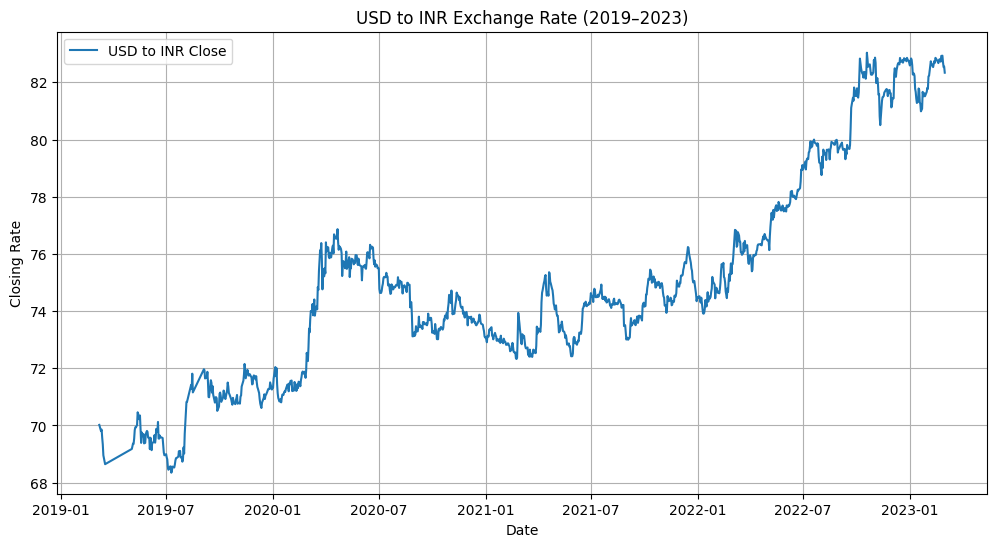

MAE: 3.2566
RMSE: 13.1702


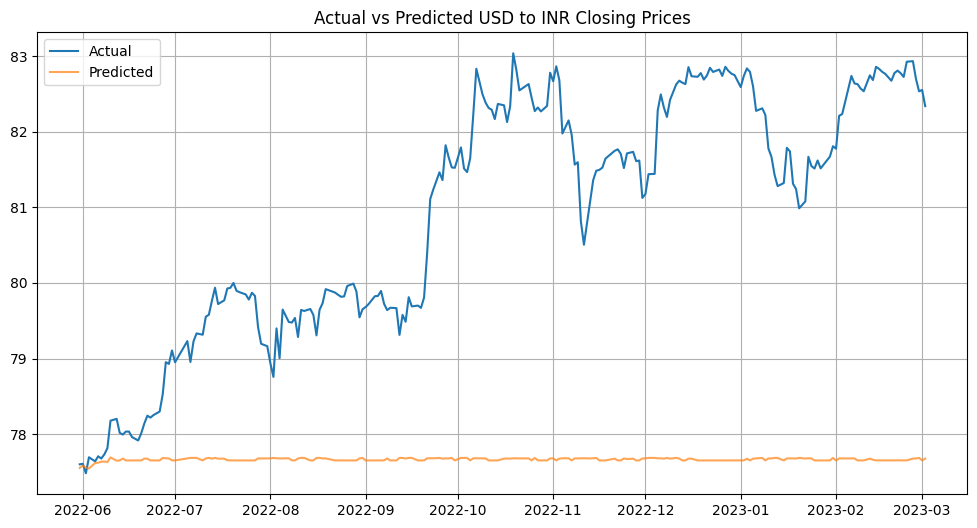

Trained model saved as inr_model.pkl


In [3]:
# -*- coding: utf-8 -*-
"""INR_Forecasting.ipynb
Automatically generated by Colab.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import pickle

# Load & preprocess data
data = pd.read_csv('HistoricalData.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_values('Date')
data = data[['Date', 'Close/Last']]
data = data.dropna()
data.set_index('Date', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close/Last'], label='USD to INR Close')
plt.title('USD to INR Exchange Rate (2019–2023)')
plt.xlabel('Date')
plt.ylabel('Closing Rate')
plt.legend()
plt.grid(True)
plt.show()

# Feature engineering: creating lag features and rolling statistics
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close/Last'].shift(lag)
data['rolling_mean_3'] = data['Close/Last'].rolling(window=3).mean()
data['rolling_std_3'] = data['Close/Last'].rolling(window=3).std()
data.dropna(inplace=True)

# Train-test split
X = data.drop('Close/Last', axis=1)
y = data['Close/Last']
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initial model training with Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Visualization
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted USD to INR Closing Prices')
plt.grid(True)
plt.show()

# Save the trained model to a pickle file
with open('inr_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Trained model saved as inr_model.pkl")
